\newpage

## Question 1

In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [114]:
kidney = pd.read_csv("/Users/echo/Desktop/Stats 3DA3 desktop/3da_ass_6/kidney_disease.csv")
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [115]:
#kidney = pd.read_csv("/Users/cassie/Library/Mobile Documents/com~apple~CloudDocs/Document/2024 winter/stats3da3/stats3da_Assignment6/kidney_disease.csv")
#kidney.head()

The dataset is from @misc_chronic_kidney_disease_336. The classification problem based on this dataset is to predict whether a patient will develop chronic kidney disease or not, using health-related attributes such as age, blood presure, red blood cells and so on.

## Question 2


In [116]:
kidney = kidney.drop('id', axis=1)

In [117]:
kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [118]:
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [119]:
kidney['rbc'] = kidney['rbc'].replace({'normal': 1, 'abnormal': 0})
kidney['pc'] = kidney['pc'].replace({'normal': 1, 'abnormal': 0})
kidney['pcc'] = kidney['pcc'].replace({'present': 1, 'notpresent': 0})
kidney['ba'] = kidney['ba'].replace({'present': 1, 'notpresent': 0})
kidney['htn'] = kidney['htn'].replace({'yes': 1, 'no': 0})
kidney['dm'] = kidney['dm'].replace({'yes': 1, 'no': 0})
kidney['cad'] = kidney['cad'].replace({'yes': 1, 'no': 0})
kidney['appet'] = kidney['appet'].replace({'good': 1, 'poor': 0})
kidney['pe'] = kidney['pe'].replace({'yes': 1, 'no': 0})
kidney['ane'] = kidney['ane'].replace({'yes': 1, 'no': 0})
kidney['classification'] = kidney['classification'].replace({'ckd': 1, 'notckd': 0})

In [120]:
kidney['pcv'] = pd.to_numeric(kidney['pcv'], errors='coerce')
kidney['wc'] = pd.to_numeric(kidney['wc'], errors='coerce')
kidney['rc'] = pd.to_numeric(kidney['rc'], errors='coerce')

In [121]:
num_col = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
bi_col = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [122]:
scaler = StandardScaler()
kidney[num_col] = scaler.fit_transform(kidney[num_col])
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,NaN,1.0,0.0,0.0,-0.341498,...,0.569881,-0.206202,0.481295,1.0,1.0,0.0,1.0,0.0,0.0,1
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,NaN,1.0,0.0,0.0,NaN,...,-0.098536,-0.818559,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,3.473064,...,-0.878356,-0.308261,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-0.392022,...,-0.766953,-0.580420,-0.788961,1.0,0.0,0.0,0.0,1.0,1.0,1
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-0.530963,...,-0.432744,-0.376301,-0.104977,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.101509,...,0.904090,-0.580420,0.188159,0.0,0.0,0.0,1.0,0.0,0.0,0
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.922524,...,1.683910,-0.206202,1.458415,0.0,0.0,0.0,1.0,0.0,0.0,0
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.606749,...,1.126896,-0.614440,0.676719,0.0,0.0,0.0,1.0,0.0,0.0,0
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.429915,...,1.349701,-0.410321,1.165279,0.0,0.0,0.0,1.0,0.0,0.0,0


First, we choose to drop vairable `id` from the dataset, because this column doesn't provide any useful informartion for our analysis or modeling.

Also, from the output we see that there are both numerical and categorical features, and we observe that most of the categorical features are binary. Therefore, to simplify the data representation and analysis, we consider transforming the bianry features into numeric representations, using 0 and 1.
The numeric transformation is performed taking careful consideration of the original meaning of each categories for different binary features. For instance, in the `rbc` variable, we transform category 'normal' as 1 and 'abnormal' as 0.

Moreover, we transformed `pcv`, `wc`, `rc` to numeric variables, because they are all in ordinal form.

Lastly, we want to ensure that all the features have the same scale, so we standardized all the numerical features.

## Question 3

In [171]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')
warnings.filterwarnings('ignore')


In [124]:
kidney.shape

(400, 25)

In [125]:
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

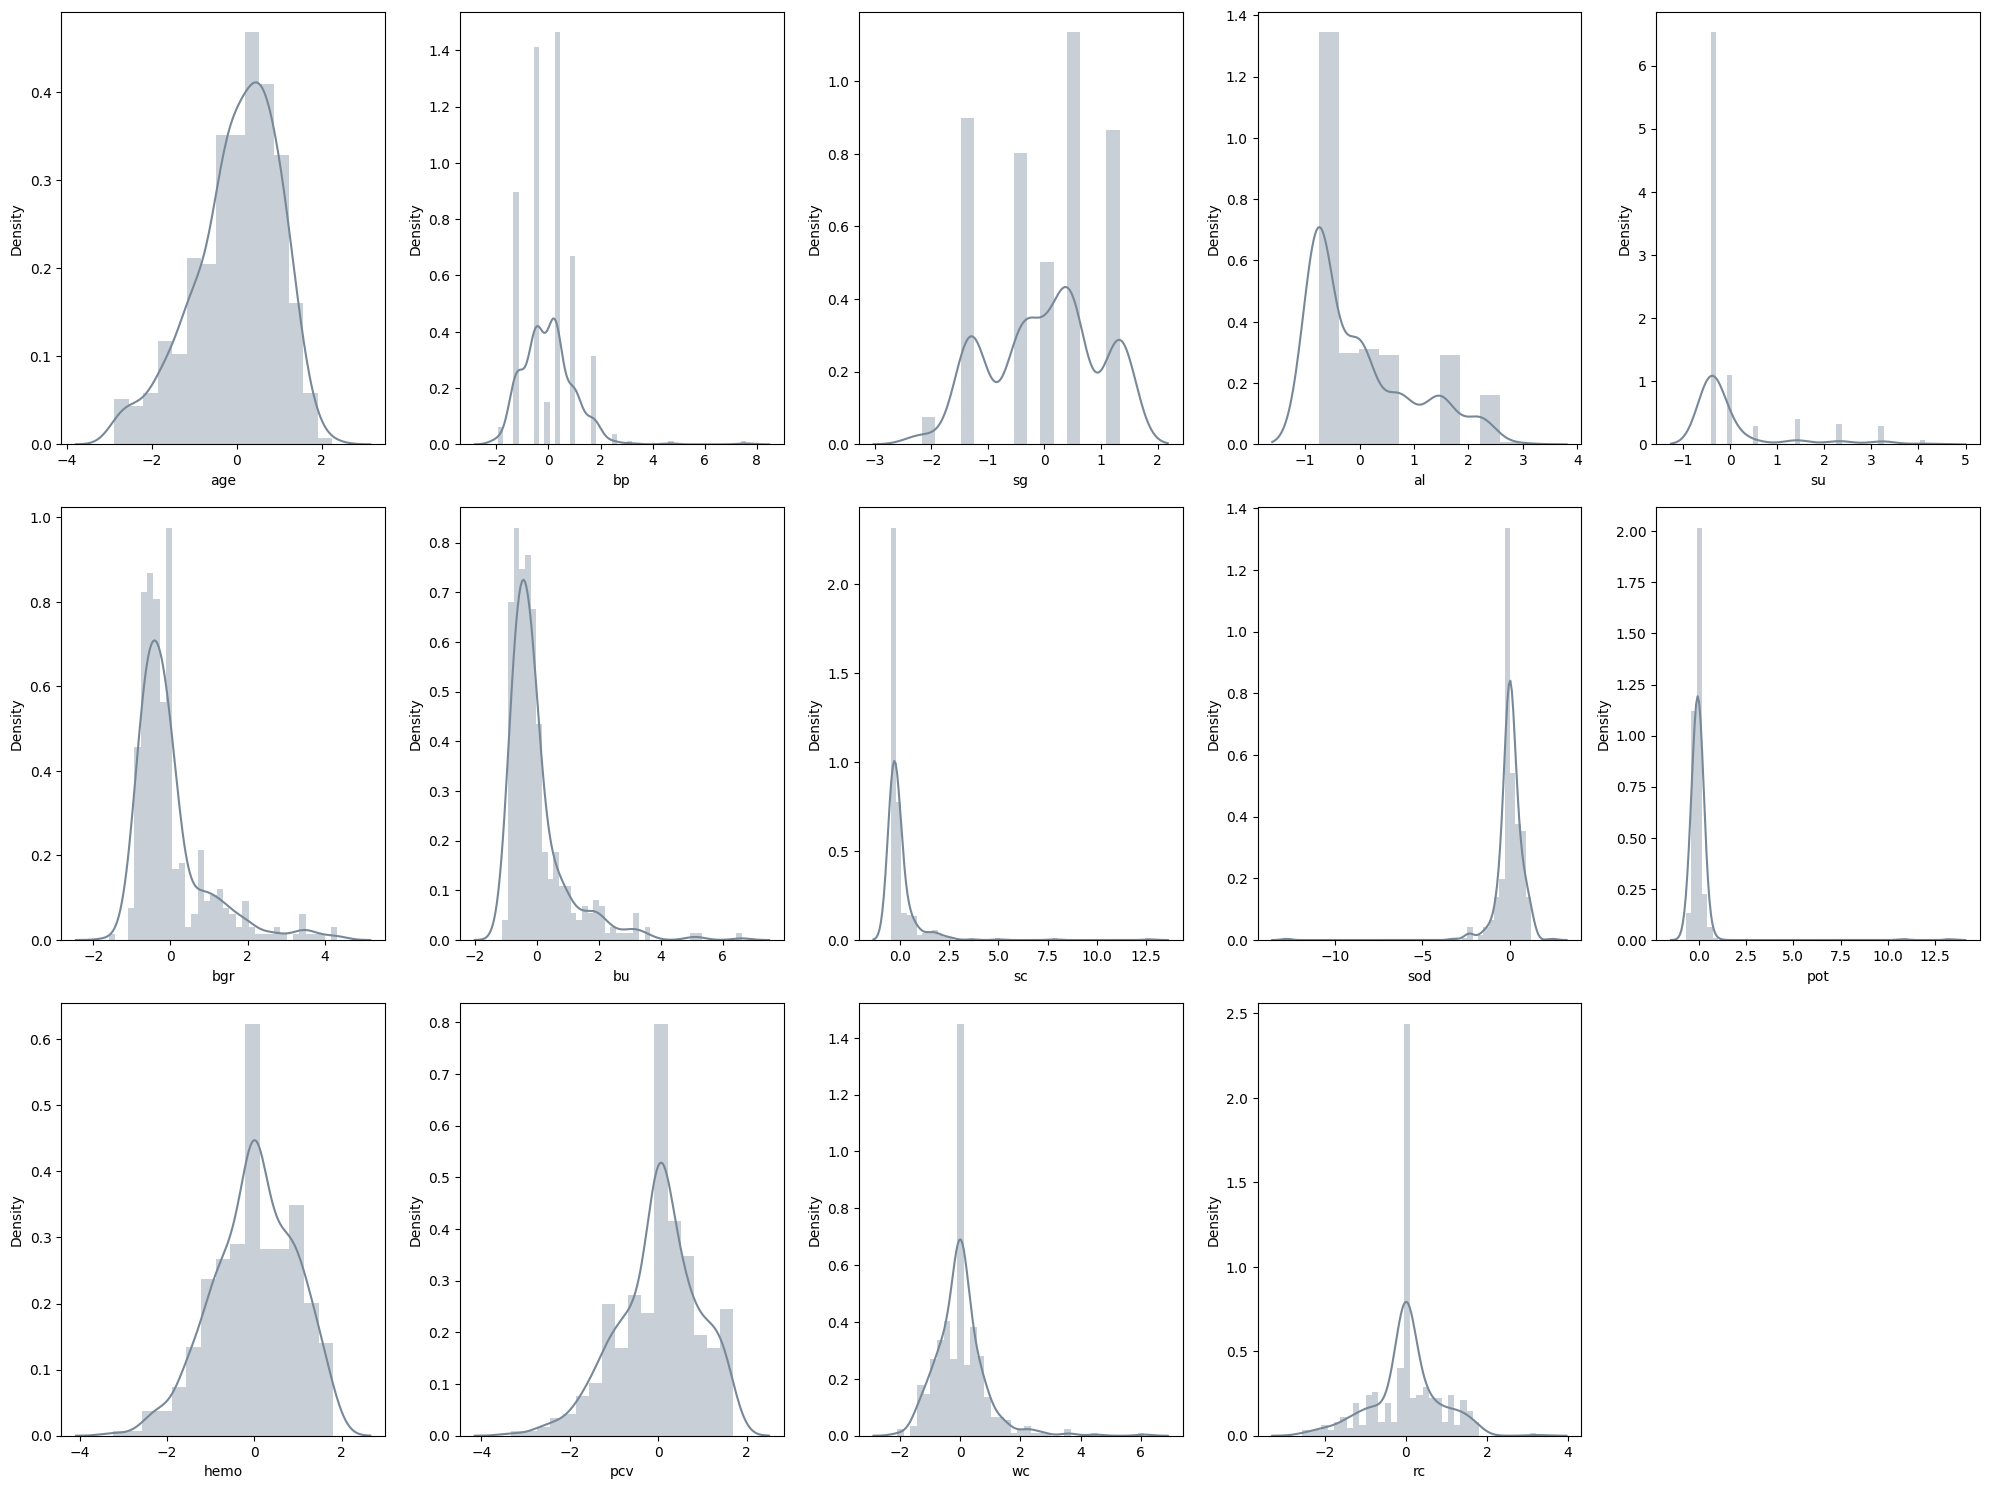

In [172]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_col, 1):
    plt.subplot(3, 5, i)
    sns.distplot(kidney[col], color='#778899')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

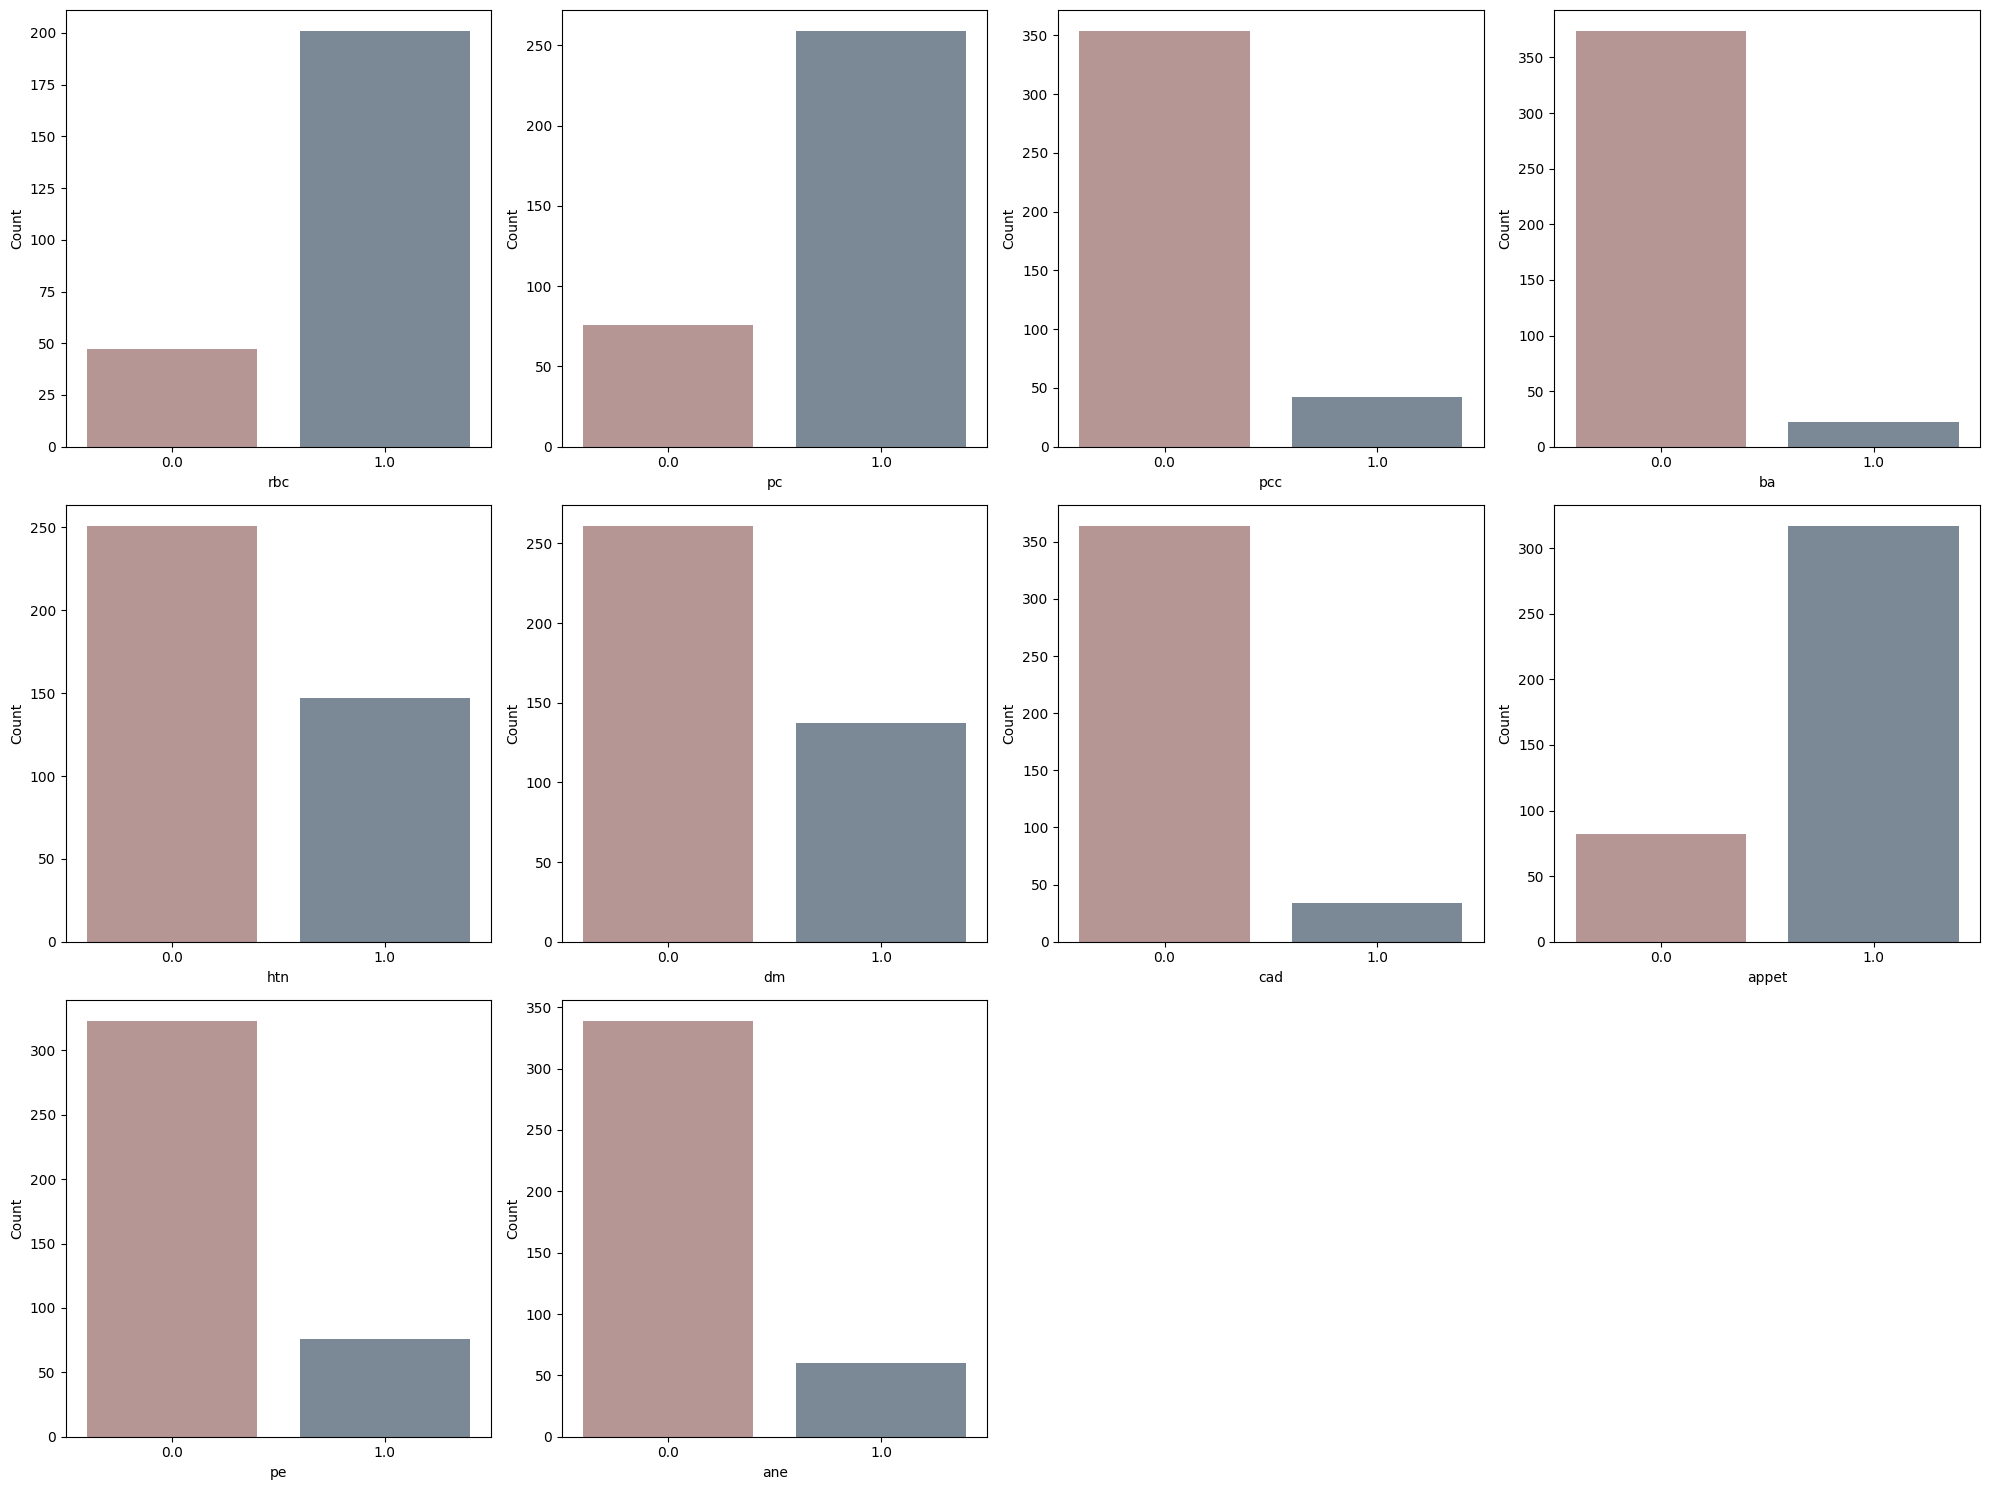

In [127]:

plt.figure(figsize=(20, 15))
for i, column in enumerate(bi_col, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=kidney, x=column, palette=['rosybrown','#778899'])
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [128]:
value_counts = kidney['classification'].value_counts()
categories = value_counts.index
counts = value_counts.values

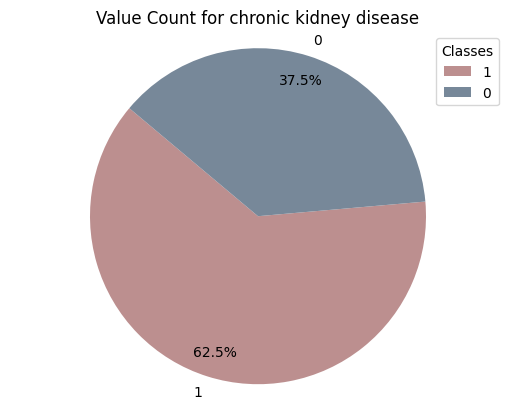

In [129]:
colors = ['rosybrown', '#778899']
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
plt.axis('equal')
plt.title('Value Count for chronic kidney disease')
plt.legend(categories, title='Classes', loc='best')
plt.show()

After the variable transformation done in Question2...

The dataset contains 400 observations and 25 columns, with 24 features and one target variable, `class`, which indicates the presence or absence of chronoic kidney disease.

There are the features in the datased are: Age (age), Blood Pressure (bp), Specific Gravity (sg), Albumin (al), Sugar (su), Red Blood Cells (rbc), Pus Cell (pc), Pus Cell Clumps (pcc), Bacteria (ba), Blood Glucose Random (bgr), Blood Urea (bu), Serum Creatinine (sc), Sodium (sod), Potassium (pot), Hemoglobin (hemo), Packed Cell Volume (pcv), White Blood Cell Count (wc), Red Blood Cell Count (rc), Hypertension (htn), Diabetes Mellitus (dm), Coronary Artery Disease (cad), Appetite (appet), Pedal Edema (pe), Anemia (ane).

From the plots we can see that the distribution for variable `bu` is  right-skewed, which indicates that there are more patients with high blood urea levels and fewer patients with low levels.

Also, it's clear from the count plot that around 200 patients have normal red blood cell. 

What's more, the pie chart shows that approximately 62.5% of the observations have chronic kidney disease.



## Question 4

In [130]:
df_num = kidney[num_col].apply(lambda x: x.fillna(x.mean()), axis=0)
df_num

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-3.414983e-01,-0.424804,-0.326574,2.270105e-17,-7.970832e-17,0.988022,0.569881,-0.206202,4.812952e-01
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,-1.796316e-16,-0.781687,-0.396338,2.270105e-17,-7.970832e-17,-0.421688,-0.098536,-0.818559,8.452553e-16
2,0.613295,0.258373,-1.297699,0.727772,2.323069,3.473064e+00,-0.087748,-0.221928,2.270105e-17,-7.970832e-17,-1.006202,-0.878356,-0.308261,8.452553e-16
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,-3.920223e-01,-0.028268,0.126891,-2.552778e+00,-6.671023e-01,-0.456071,-0.766953,-0.580420,-7.889609e-01
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,-5.309633e-01,-0.623073,-0.291692,2.270105e-17,-7.970832e-17,-0.318538,-0.432744,-0.376301,-1.049768e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,-1.015093e-01,-0.167055,-0.448661,1.200069e+00,8.553625e-02,1.091172,0.904090,-0.580420,1.881592e-01
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,-9.225244e-01,-0.523939,-0.326574,3.340270e-01,-3.535029e-01,1.366237,1.683910,-0.206202,1.458415e+00
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,-6.067493e-01,-0.623073,-0.431220,-5.088032e-02,-7.126345e-02,1.125555,1.126896,-0.614440,6.767192e-01
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,-4.299153e-01,-0.147229,-0.361456,-2.433340e-01,8.553625e-02,0.575424,1.349701,-0.410321,1.165279e+00


Text(0.5, 1.0, 'Correlation Heatmap Between Features')

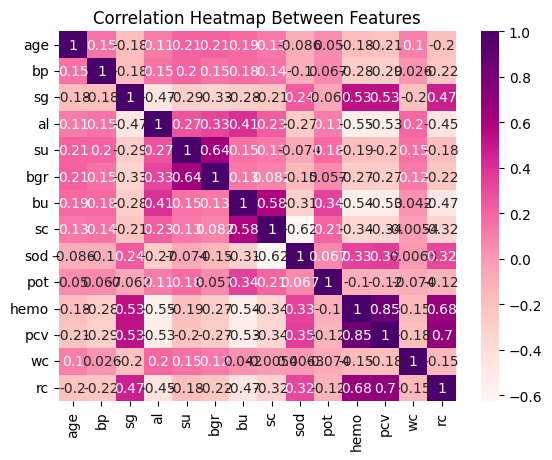

In [131]:
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu')
plt.title('Correlation Heatmap Between Features')

From the heatmap we can observe that variables `bgr` and `su` have strong positive correlation (0.64), which suggests that as the amount of sugar increases, there is a tendency for the level of blood glucose random to increase as well.

Also, we find that `sc` and `bu` are positively correlated as well, with correlation of 0.58, which implies that pateints with higher blood urea may have a higher level of serum creatinine.

Also, with the correlation of -0.62, the variables `sod` and `sc` are the most negtively correlated, so we can say that as serum creatinine	decreases, there is a strong tendency for the level of sodium to increase.

## Question 5

In [132]:
missings = kidney.isnull().sum()
missings

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [133]:
mean = kidney[num_col].mean()
kidney[num_col] = kidney[num_col].fillna(mean)

mode = kidney.mode().iloc[0]
kidney[bi_col] = kidney[bi_col].fillna(mode) 

kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,1.0,1.0,0.0,0.0,-3.414983e-01,...,0.569881,-0.206202,4.812952e-01,1.0,1.0,0.0,1.0,0.0,0.0,1
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,1.0,1.0,0.0,0.0,-1.796316e-16,...,-0.098536,-0.818559,8.452553e-16,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,3.473064e+00,...,-0.878356,-0.308261,8.452553e-16,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-3.920223e-01,...,-0.766953,-0.580420,-7.889609e-01,1.0,0.0,0.0,0.0,1.0,1.0,1
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-5.309633e-01,...,-0.432744,-0.376301,-1.049768e-01,0.0,0.0,0.0,1.0,0.0,0.0,1


In [134]:
missings = kidney.isnull().sum()
missings

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

To address missing values, we filled missing values in numerical variables with their means, and we filled missing values in binary  variables with their most frequent level.

Also, for categorical variables that have multiple levels, we transformed them into numerical form and then filled the missing values with their means.

## Question 6

In [135]:
x = kidney.drop('classification',axis=1)
y = kidney['classification']

In [136]:
def detect_outliers(data, col):
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1

    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    outliers = data[(data[col] > upper_bound) | (data[col] < lower_bound)]

    return outliers

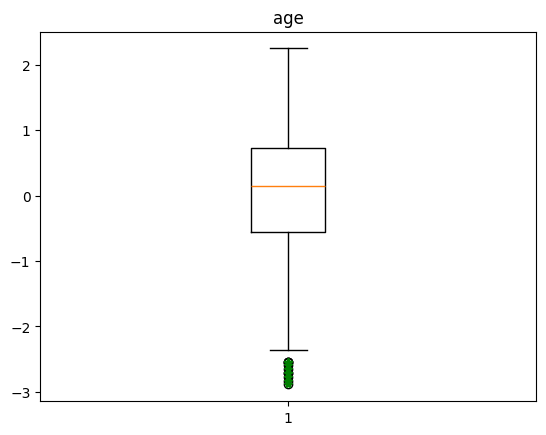

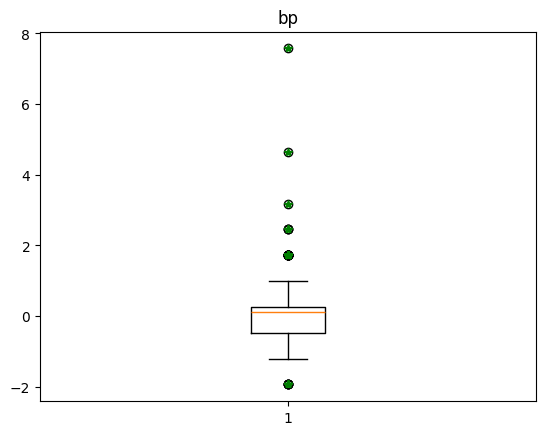

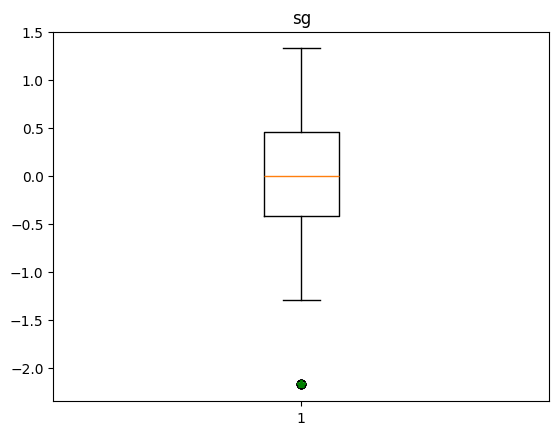

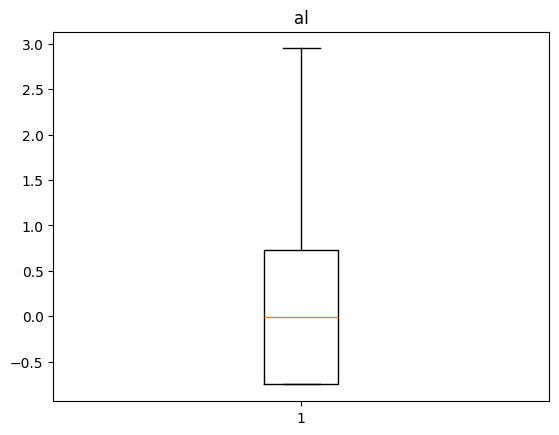

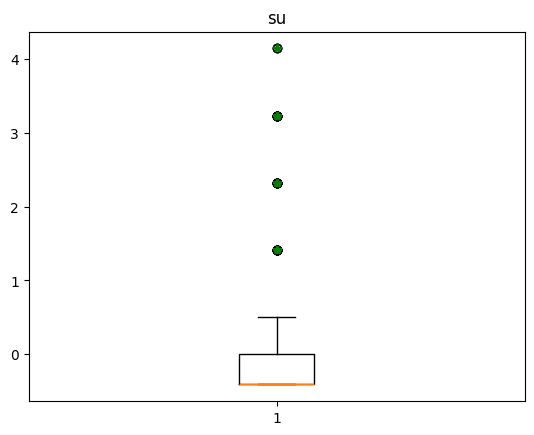

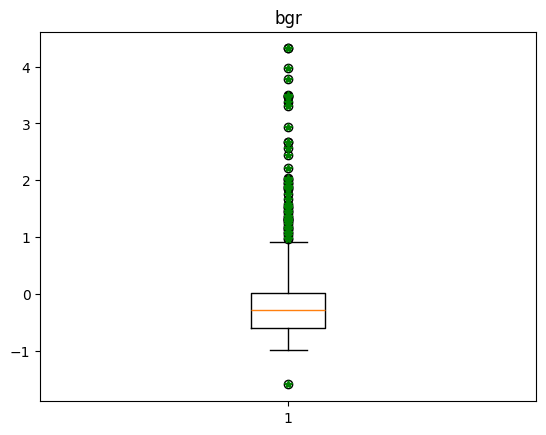

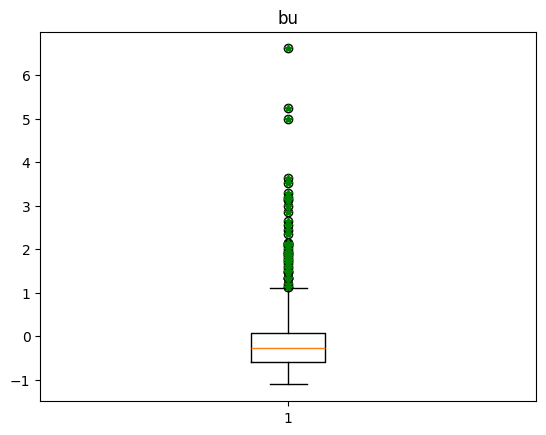

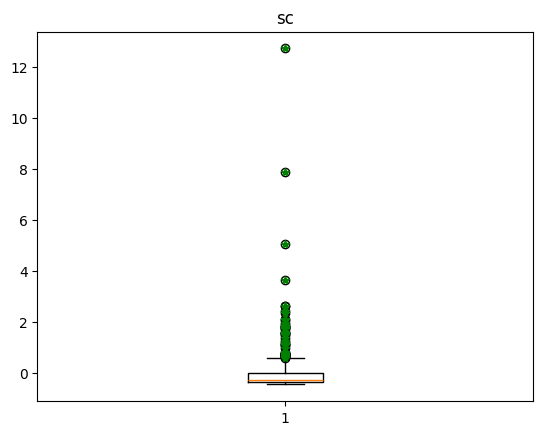

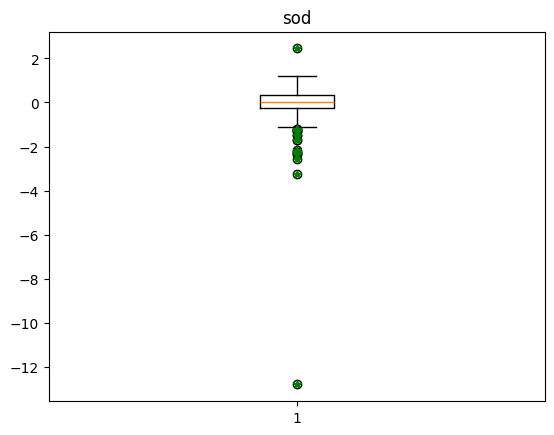

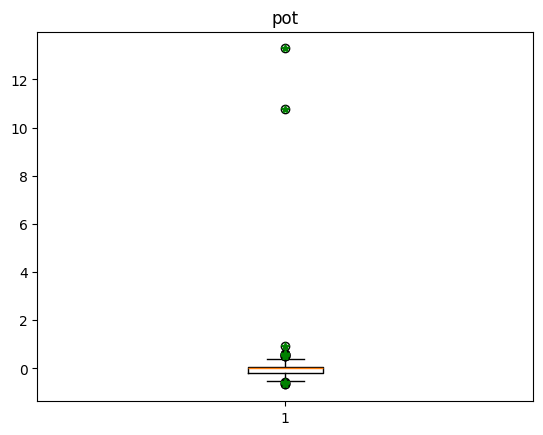

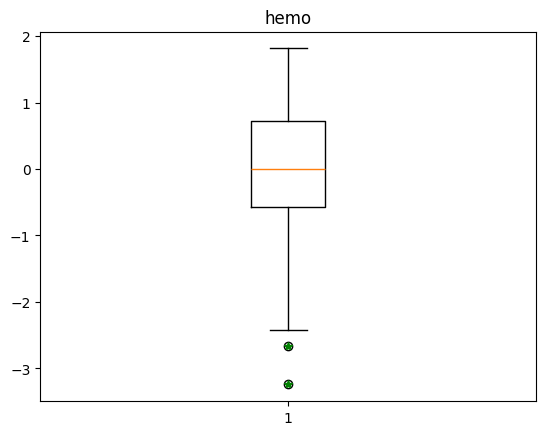

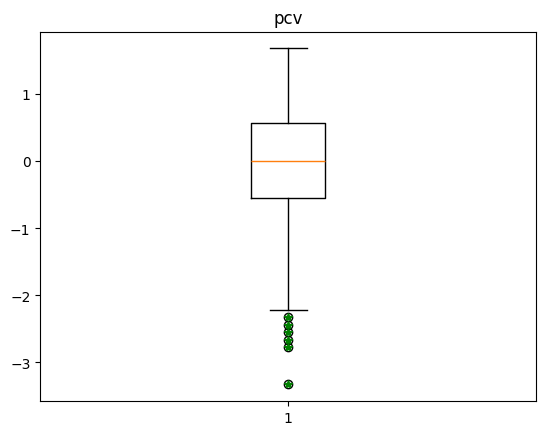

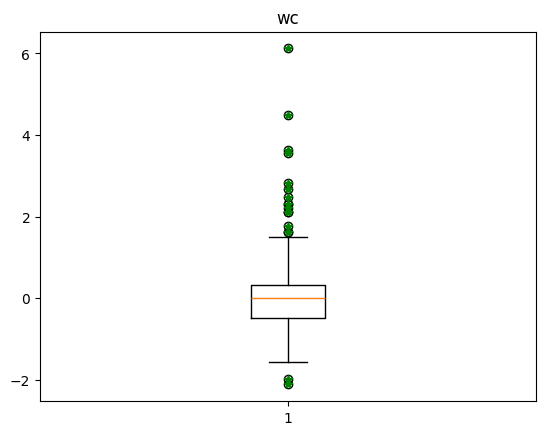

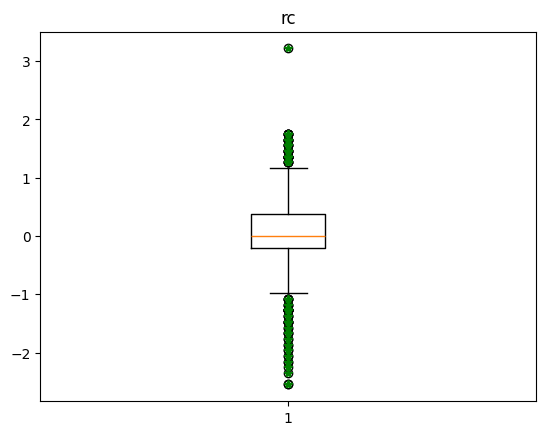

In [137]:
for col in num_col:
    # detect outliers
    outliers = detect_outliers(x, col)

    # create the boxplot
    fig, ax = plt.subplots()
    ax.boxplot(x[col])
    ax.set_title(col)

    # mark the outliers
    for index, row in outliers.iterrows():
        ax.plot(1, row[col], 'g*')

    # show the plot
    plt.show()

In [138]:
detect_outliers(kidney, num_col).drop(bi_col, axis=1)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.594124,-1.936857,NaN,2.208413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,2.323069,3.473064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-2.173584,2.208413,NaN,NaN,NaN,NaN,-2.552778,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.683910,NaN,NaN,NaN
397,-2.302541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,-2.010957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 7

In [139]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

In [140]:
pca_X = PCA()
pca_loadings = pd.DataFrame(pca_X.fit(x).components_.T, 
                            index=x.columns, 
                            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                     'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24'])
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
age,0.163744,-0.223728,0.277279,-0.412386,-0.465199,-0.617097,-0.112038,0.050562,0.157896,0.049475,...,0.024215,0.043226,0.084853,-0.048258,-0.052577,0.026609,0.036492,-0.008517,-0.008466,-0.007498
bp,0.177148,-0.091818,0.108974,-0.676162,-0.053237,0.629353,0.215219,0.026419,0.179897,0.007796,...,-0.015176,-0.004086,0.014333,-0.006973,-0.024919,-0.045234,0.037837,0.011977,0.021379,-0.009957
sg,-0.295206,0.141609,0.234392,-0.103098,0.003571,-0.005508,0.056622,-0.829606,-0.067198,0.328054,...,0.012559,0.003460,-0.024318,-0.057846,0.021267,-0.000245,0.042876,-0.034003,0.009669,0.021374
al,0.311991,-0.063509,-0.224997,0.196243,0.167188,-0.032332,-0.017493,-0.204262,0.762125,0.123885,...,-0.215907,-0.074014,0.197333,0.004607,0.049009,0.007542,0.055272,0.007040,-0.001194,-0.083899
su,0.195823,-0.483840,0.356545,0.199517,0.125096,0.138751,0.079477,-0.042238,-0.151181,-0.109637,...,0.071876,0.060877,0.054423,0.025131,-0.018029,0.048643,-0.059889,-0.073490,0.002497,-0.013335
rbc,-0.050890,-0.006686,0.038103,-0.012677,-0.017115,-0.037722,0.030202,0.030181,-0.110461,0.057054,...,-0.169710,0.068264,0.222256,0.541149,0.113211,-0.537826,0.399226,-0.138680,-0.270924,-0.181057
pc,-0.096472,0.011941,0.053289,-0.018397,-0.071838,0.009624,0.021986,0.038118,-0.154659,-0.025759,...,-0.419890,-0.192819,0.566092,-0.115368,0.049458,-0.077161,-0.067046,0.161947,0.392064,0.373505
pcc,0.052590,-0.030283,-0.048973,0.021640,-0.002267,-0.030192,-0.002666,-0.011322,0.091617,0.010696,...,0.163287,0.152805,-0.293255,0.316528,0.344376,-0.162871,0.151534,0.047164,0.642448,0.307812
ba,0.028661,-0.009118,-0.032156,0.006842,0.013572,0.004777,0.009469,-0.005858,0.086139,-0.014056,...,0.060693,0.059546,-0.049275,-0.052769,0.098386,-0.129436,-0.019866,0.074276,-0.554179,0.790147
bgr,0.215403,-0.495017,0.219446,0.284253,-0.005181,0.148472,-0.169923,-0.184750,-0.124162,0.005067,...,-0.002681,-0.035197,0.072122,-0.018134,-0.081513,-0.077997,0.028687,0.007916,0.014611,0.034727


In [141]:
pc_scores = pd.DataFrame(
    pca_X.transform(x),
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                     'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24'],
    index=x.index
)
pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-1.126096,-0.051177,0.251939,-0.221743,-0.174617,0.265732,0.022493,-0.090474,0.572326,0.287283,...,-0.461383,-0.444875,-0.463607,0.296568,0.258446,0.238029,-0.020904,0.004939,-0.071121,0.042695
1,-0.713965,0.719191,-1.680807,2.543062,1.655340,0.565545,-1.073108,-0.715460,0.869754,0.744786,...,-0.691007,-0.139307,0.479062,-0.110186,0.236040,-0.167076,0.103141,-0.119546,0.014580,-0.185667
2,2.664229,-3.161935,0.781938,0.992487,0.210229,0.684855,-1.099201,-0.034956,-0.646016,-0.353574,...,0.243824,0.350134,1.217147,0.067979,0.330669,0.374689,0.331344,0.255812,-0.127484,-0.126440
3,2.546107,1.021639,-1.706398,1.510268,-0.973943,0.335632,-1.075256,1.083483,1.730742,0.590721,...,0.714995,0.351155,0.367063,1.187848,-0.279899,0.157106,-0.011433,-0.000175,0.297511,-0.117905
4,0.267522,0.084497,-1.033060,-0.245040,0.078197,0.221100,-0.471471,1.256718,0.573576,0.135769,...,-0.294483,-0.193599,0.462108,-0.099848,0.015235,-0.140121,0.108776,-0.070749,-0.000941,-0.161066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.836831,-0.281001,0.552994,-0.859268,0.333991,-0.137166,-0.218589,0.085222,0.089361,-0.501718,...,-0.053221,-0.116640,0.071273,0.046778,-0.066944,-0.024347,0.075431,0.057806,0.019799,0.008978
396,-3.194296,0.387253,0.627411,0.234210,-0.135894,0.097661,0.427437,-0.395969,0.542821,-0.283245,...,0.007998,0.263196,-0.158801,0.106243,0.028970,0.060392,-0.060728,0.080780,-0.017967,-0.009001
397,-2.491306,0.678241,-0.048461,0.538923,0.725338,1.760391,0.128581,0.268506,0.057213,-0.069182,...,-0.030157,-0.005737,-0.138337,0.159253,0.042675,-0.040777,-0.074019,0.073878,0.022888,0.009063
398,-2.697773,0.988218,0.275947,1.426162,0.777462,0.605120,0.045674,-0.617359,-0.192834,-0.002695,...,-0.120511,0.449382,-0.178512,-0.053719,0.044624,-0.119317,-0.136835,-0.038756,0.025099,0.034584


In [142]:
pc_scores.var()

PC1     4.392111
PC2     1.473818
PC3     1.110992
PC4     0.928267
PC5     0.909305
PC6     0.841049
PC7     0.648943
PC8     0.511006
PC9     0.493134
PC10    0.381556
PC11    0.302385
PC12    0.255862
PC13    0.216661
PC14    0.174726
PC15    0.144494
PC16    0.119038
PC17    0.100446
PC18    0.097069
PC19    0.088544
PC20    0.077189
PC21    0.071419
PC22    0.054153
PC23    0.041617
PC24    0.038226
dtype: float64

In [143]:
np.sum(pc_scores.var())

13.472011278195481

In [144]:
print(pca_X.explained_variance_)
print(pca_X.explained_variance_ratio_)

[4.39211094 1.47381819 1.1109917  0.928267   0.90930501 0.84104926
 0.64894312 0.5110063  0.49313447 0.38155552 0.30238527 0.25586249
 0.21666067 0.17472602 0.14449442 0.11903755 0.10044645 0.09706937
 0.08854397 0.07718852 0.07141898 0.05415326 0.04161668 0.03822612]
[0.32601746 0.10939853 0.08246665 0.06890337 0.06749586 0.06242938
 0.04816973 0.03793096 0.03660437 0.02832209 0.02244544 0.01899215
 0.01608228 0.01296956 0.01072553 0.00883592 0.00745594 0.00720526
 0.00657244 0.00572955 0.00530129 0.00401969 0.00308912 0.00283745]


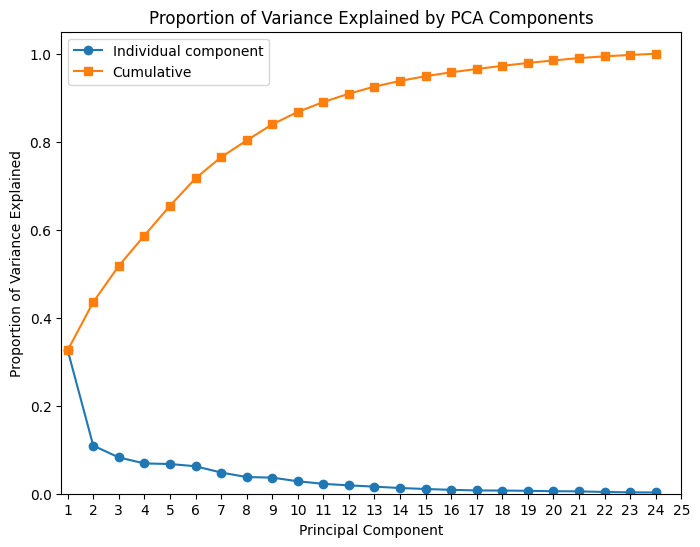

In [145]:
plt.figure(figsize=(8, 6))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.legend(loc=2)
plt.title('Proportion of Variance Explained by PCA Components')
plt.show()

In [146]:
from sklearn.cluster import KMeans

In [147]:
km=KMeans(n_clusters=2,n_init=20,random_state=0)
km.fit(x)
km.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [148]:
pd.Series(km.labels_).value_counts()

1    206
0    194
Name: count, dtype: int64

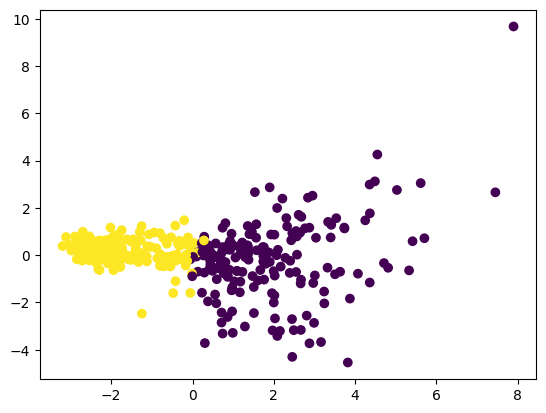

In [149]:
plt.scatter(pc_scores['PC1'],pc_scores['PC2'],c=km.labels_)

In [150]:
pca = PCA(n_components=2)
pca.fit(x)
print("Data before PCA")
display(x)
x_pca = pca.transform(x)
print("Data after PCA")
df_x_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
display(df_x_pca)

Data before PCA


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,1.0,1.0,0.0,0.0,-3.414983e-01,...,0.988022,0.569881,-0.206202,4.812952e-01,1.0,1.0,0.0,1.0,0.0,0.0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,1.0,1.0,0.0,0.0,-1.796316e-16,...,-0.421688,-0.098536,-0.818559,8.452553e-16,0.0,0.0,0.0,1.0,0.0,0.0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,3.473064e+00,...,-1.006202,-0.878356,-0.308261,8.452553e-16,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-3.920223e-01,...,-0.456071,-0.766953,-0.580420,-7.889609e-01,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-5.309633e-01,...,-0.318538,-0.432744,-0.376301,-1.049768e-01,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-1.015093e-01,...,1.091172,0.904090,-0.580420,1.881592e-01,0.0,0.0,0.0,1.0,0.0,0.0
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-9.225244e-01,...,1.366237,1.683910,-0.206202,1.458415e+00,0.0,0.0,0.0,1.0,0.0,0.0
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-6.067493e-01,...,1.125555,1.126896,-0.614440,6.767192e-01,0.0,0.0,0.0,1.0,0.0,0.0
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-4.299153e-01,...,0.575424,1.349701,-0.410321,1.165279e+00,0.0,0.0,0.0,1.0,0.0,0.0


Data after PCA


,PC1,PC2
0,-1.126096,-0.051177
1,-0.713965,0.719191
2,2.664229,-3.161935
3,2.546107,1.021639
4,0.267522,0.084497
...,...,...
395,-1.836831,-0.281001
396,-3.194296,0.387253
397,-2.491306,0.678241
398,-2.697773,0.988218


## Question 8

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_test, y_train=train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=1)

## Question 9

We decide to choose **logistic regression classifier** and **decision tree classifier**.

***For logistic regression***: Logistic Regression is a simple and efficient linear model suitable for binary classification problems,(presence or absence of kidney disease). It provides interpretable coefficients that can help in understanding feature importance.\

***For decision tree***: Decision Trees are flexible, can model complex relationships, and are intuitive to interpret. They can fit non-linear patterns without the need for data transformation. However, they are moreprone to overfitting in some case.


## Question 10

The evaluation metrics that summarize the performance of the model. There four different kinds of metrics, Precision, Recall, F1-score and Accuracy. Precision measures the proportion of predicted positive cases that are actually positive. Recall measures the proportion of actual positive cases that are predicted correctly. F1-score is the harmonic mean of precision and recall, and it is a way to balance the trade-off between the two metrics. Accuracy is the proportion of instances in the dataset that were classified correctly. In the project, we are using F1-score and accuracy.

## Question 11&12

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [154]:
#Build Decision Tree model on the dataset
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#make prediction on test data
y_pred_dt = dt.predict(X_test)

#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[51  1]
 [ 4 64]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        52
           1       0.98      0.94      0.96        68

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In this case, precision and recall are both high for class 0 and 1, indicating that the model is performing well in predicting these classes. 

In [155]:
#Build logistic model on the dataset
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

#make prediction on test data
y_pred_log = log.predict(X_test)

#evaluating the algorithm
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


[[51  1]
 [ 2 66]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.97      0.98        68

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [156]:
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_F1 = f1_score(y_test, y_pred_dt)
print("Decision tree accuracy:", dt_acc)
print("Decision tree F1 score:", dt_F1)

log_acc = accuracy_score(y_test, y_pred_log)
log_F1 = f1_score(y_test, y_pred_log)
print("Logistic regression accuracy:", log_acc)
print("Logistic F1 score:", log_F1)

Decision tree accuracy: 0.9583333333333334
Decision tree F1 score: 0.9624060150375939
Logistic regression accuracy: 0.975
Logistic F1 score: 0.9777777777777777


***Comparison between two classifier:***\
In choosing between them, we should consider the complexity of the relationships in our dataset,the importance of interpretability, the need for featuring, and the propensity of the model to overfit. For instance, if interpretability is key and our data includes complex, non-linearrelationships, a Decision Tree would be more suitable. Conversely, if we expect that a linear model could work well with the dataset or we are working with a very large, high-dimensional dataset. Logistic Regression could be more appropriate.

The **logistic regression model** displays exceptional predictive performance with an accuracy of 0.975 and F1-scores of 0.97 for class. \
The **decision tree classifier** also shows high performance with an accuracy of 0.958 and F1-scores of 0.962 for class. \
In summary, while both models are likely to be highly effective due to their high F1-scores and accuracy. The perfect precision and recall for class by the logistic regression model may be particularly valuable in clinical settings for CKD. However, decision trees offer a level of interpretability that can be important for clinical decision-making and understanding the model's predictions. Therefore, the final model choice might also consider the trade-off between the slight performance benefit of logistic regression and the interpretability of decision trees. 


All in all, based on F1 score and accuracy, we choose the **Logistic Regression** as the better classifier.

In [157]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import metrics

In [158]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_log))

0.15811388300841897

In [159]:
sfs = SFS(
    log,
    k_features=(1,10),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=5
    )

In [160]:
sfs = sfs.fit(X_train, y_train)

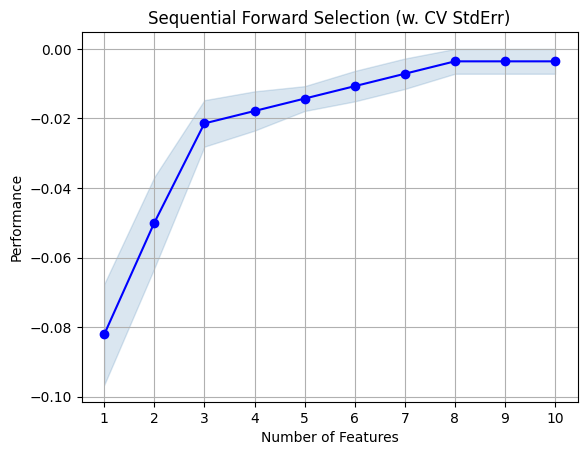

In [161]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()

In [162]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['sg', 'al', 'bgr', 'sod', 'hemo', 'pcv', 'dm', 'appet'], dtype='object')

In [163]:
# Prediction on hold-out set
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]
sfs_m = LogisticRegression()
sfs_m.fit(X_train_sfs, y_train)
sfs_test = sfs_m.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_test))

0.12909944487358055

We choose the stepwise selection method to improve logistic regression classifier. And, we verify that this method that will reduce MSE which means it could enhance the performance of this classifier. The specific code presentation is combined in Question11 and Question 12.

## Question 13

In [164]:
y_pred_dt_all = dt.predict(x)
y_pred_dt_all

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [165]:
y_pred_log_all = log.predict(x)
y_pred_log_all

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

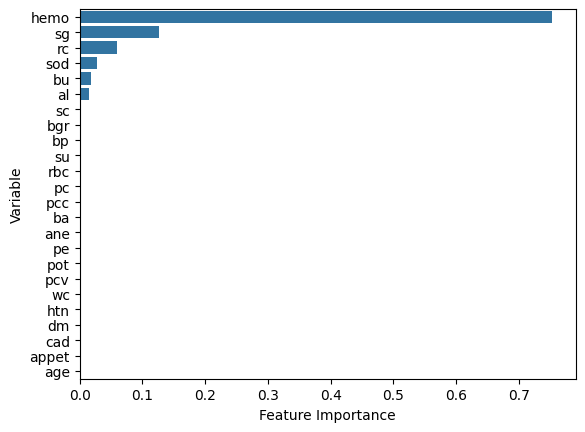

In [166]:
fea_imp = dt.feature_importances_
sorted_indices = fea_imp.argsort()[::-1] 
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]

sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Variable")
plt.show()

**Significance of Serum Creatinine (sc) in Logistic Regression:**\
If the logistic regression model shows a high positive coefficient for serum creatinine (sc), this indicates a strong association between elevated creatinine levels and the likelihood of having CKD. This insight highlights the importance of `sc` as a critical biomarker for diagnosing kidney disease, guiding clinical decisions regarding the need for further diagnostic testing or early intervention.

**Significance of Hypertension (htn) in Decision Tree Analysis:**\
This suggests that hypertension is a primary factor in determining the presence of kidney disease. This finding emphasizes the need for managing blood pressure strictly in patients at risk for or diagnosed with CKD to prevent further renal deterioration.

These interpretations help in understanding which variables are most predictive of CKD and should be closely monitored in clinical settings to manage and potentially prevent the progression of kidney disease. The significance of these predictors also assists in educating patients about risk factors and the importance of regular screening for early detection of kidney problems.

## Question 15


Group members: 

Zien Xiong (400366281)  (Question 1-5)\
Wen Yang(400312905)     (Question 6-9)\
Jiaying Xie(400307943)  (Question 10-13)

Each group member contributed equally to the assignment.

## Question 16

link: 
https://github.com/Echosu0/stats_3da_ass6.git
